# Multiclass Fish Image Classification

In [1]:
# Libraries
import os 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.models import Sequential, load_model 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense 
from tensorflow.keras.applications import VGG16, ResNet50, MobileNet, InceptionV3, EfficientNetB0 
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Flatten
from PIL import Image 
import cv2 

# Data Preprocessing and Augmentation

In [4]:
# Define image size
img_size = (224, 224)

# Define directories for training and validation datasets
train_dir = "C:/Users/anand/Desktop/Dataset/images.cv/data/train"
val_dir = "C:/Users/anand/Desktop/Dataset/images.cv/data/val"

# Image Data Generator for Data Augmentation and Rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=32,
    class_mode='categorical'
)

Found 6225 images belonging to 11 classes.
Found 1092 images belonging to 11 classes.


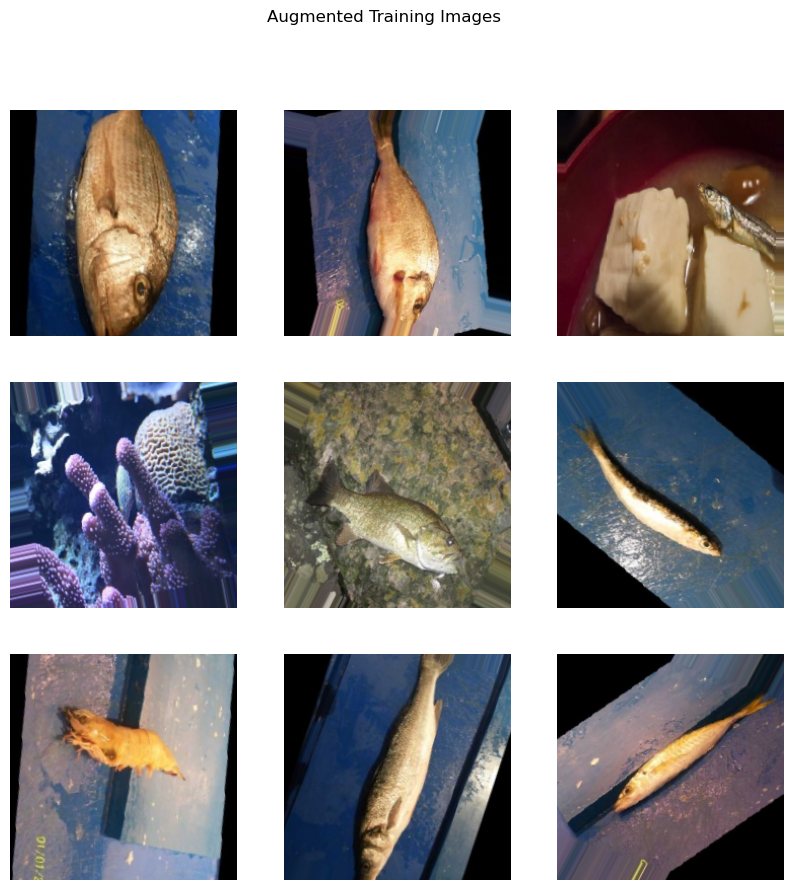

In [6]:
# Get a batch of augmented images from the training generator
train_images, _ = next(train_generator)

# Plot the first 9 augmented images from the training generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(train_images[i])
    plt.axis('off')
plt.suptitle("Augmented Training Images")
plt.show()

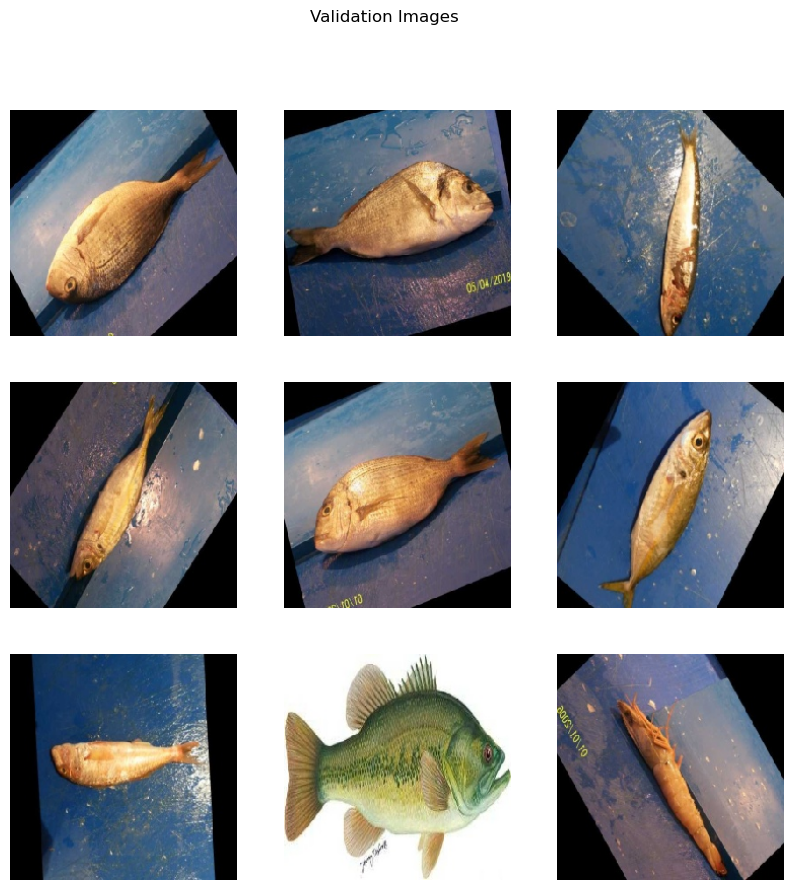

In [8]:
# Get a batch of augmented images from the validation generator
val_images, _ = next(val_generator)

# Plot the first 9 augmented images from the validation generator
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(val_images[i])
    plt.axis('off')
plt.suptitle("Validation Images")
plt.show()

# Model Training

1. Train a CNN model from scratch

In [24]:
# Define a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Save the trained model
model.save('cnn_model.h5')

C:\Users\anand\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\anand\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.3809 - loss: 3.2880 - val_accuracy: 0.6438 - val_loss: 0.9568
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 177us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25


C:\Users\anand\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


195/195 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.7021 - loss: 0.8225 - val_accuracy: 0.7995 - val_loss: 0.6042
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 139us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.8061 - loss: 0.5407 - val_accuracy: 0.9112 - val_loss: 0.3553
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 48us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.8746 - loss: 0.3748 - val_accuracy: 0.9084 - val_loss: 0.2979
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.9123 - loss: 0.2701 - val_accuracy: 0.9313 - val_loss: 0.1984
Epoch 10/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 60us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.8981 - loss: 0.2853 - val_accuracy: 0.9386 - 

2. Experiment with five pre-trained Models and Fine_Tune

VGG16

In [10]:
# VGG16 Model FineTuning

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('vgg16_finetuned.h5')

C:\Users\anand\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 411s 2s/step - accuracy: 0.5703 - loss: 3.0000 - val_accuracy: 0.8883 - val_loss: 0.3286
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25


C:\Users\anand\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


195/195 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.9308 - loss: 0.2311 - val_accuracy: 0.9359 - val_loss: 0.1913
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 63us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.9629 - loss: 0.1262 - val_accuracy: 0.9707 - val_loss: 0.0870
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 46us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 405s 2s/step - accuracy: 0.9783 - loss: 0.0781 - val_accuracy: 0.9762 - val_loss: 0.0774
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 89us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 403s 2s/step - accuracy: 0.9705 - loss: 0.0916 - val_accuracy: 0.9808 - val_loss: 0.0472
Epoch 10/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 45us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.9736 - loss: 0.0785 - val_accuracy: 0.9799 - v

ResNet50

In [26]:
# ResNet50 Model FineTuning

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('resnet50_finetuned.h5')

Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 355s 2s/step - accuracy: 0.1813 - loss: 9.8539 - val_accuracy: 0.3214 - val_loss: 1.9115
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 351s 2s/step - accuracy: 0.3022 - loss: 1.9963 - val_accuracy: 0.3498 - val_loss: 1.8391
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 356s 2s/step - accuracy: 0.3583 - loss: 1.8026 - val_accuracy: 0.4863 - val_loss: 1.4064
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 421us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.4462 - loss: 1.5763 - val_accuracy: 0.4460 - val_loss: 1.5469
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 264us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 350s 2s/step - accuracy: 0.4727 - loss: 1.4737 - val_accurac

MobileNet

In [24]:
# MobileNet Model FineTuning

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('mobilenet_finetuned.h5')

17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step
Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 312s 2s/step - accuracy: 0.7140 - loss: 11.9566 - val_accuracy: 0.9588 - val_loss: 0.1948
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 293s 2s/step - accuracy: 0.9664 - loss: 0.1488 - val_accuracy: 0.9817 - val_loss: 0.0456
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 278s 1s/step - accuracy: 0.9733 - loss: 0.1194 - val_accuracy: 0.9890 - val_loss: 0.0841
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 413us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.9803 - loss: 0.0982 - val_accuracy: 0.9762 - val_loss: 0.0990
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 248us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 282s 1s/st

InceptionV3

In [13]:
# InceptionV3 Model FineTuning

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('inceptionv3_finetuned.h5')

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 42s 0us/step
Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.6476 - loss: 11.9071 - val_accuracy: 0.9011 - val_loss: 0.3469
Epoch 2/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 188s 963ms/step - accuracy: 0.9409 - loss: 0.2298 - val_accuracy: 0.9707 - val_loss: 0.0957
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 571us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 187s 960ms/step - accuracy: 0.9405 - loss: 0.2293 - val_accuracy: 0.9212 - val_loss: 0.3155
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 386us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 188s 962ms/step - accuracy: 0.9511 - loss: 0.1749 - val_accuracy: 0.9643 - val_loss: 0.1270
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 328us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 

EfficientNetB0

In [11]:
# EfficientNetB0 Model FineTuning

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(len(train_generator.class_indices), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

model.save('efficientnetb0_finetuned.h5')

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


C:\Users\anand\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 467s 2s/step - accuracy: 0.1126 - loss: 13.4947 - val_accuracy: 0.0897 - val_loss: 2.8840
Epoch 2/25


C:\Users\anand\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 443s 2s/step - accuracy: 0.1081 - loss: 2.8406 - val_accuracy: 0.0824 - val_loss: 2.4151
Epoch 4/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 354s 2s/step - accuracy: 0.1532 - loss: 2.3770 - val_accuracy: 0.1712 - val_loss: 2.3754
Epoch 6/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 220s 1s/step - accuracy: 0.1756 - loss: 2.3667 - val_accuracy: 0.1712 - val_loss: 2.3527
Epoch 8/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 302us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.1800 - loss: 2.3447 - val_accuracy: 0.1712 - val_loss: 2.3393
Epoch 10/25
195/195 ━━━━━━━━━━━━━━━━━━━━ 0s 309us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/25
195/19

# Save the trained model (max accuracy model ) for future use

In [22]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score
import numpy as np
import os

# Evaluate the models to get the best model
def evaluate_model(model, data_generator):
    # Print the model summary
    print("Model summary:")
    model.summary()
    
    Y_pred = model.predict(data_generator)
    y_pred = np.argmax(Y_pred, axis=1)
    y_true = data_generator.classes
    accuracy = accuracy_score(y_true, y_pred)
    return accuracy

# Initialize the validation generator
validation_data_dir = "C:/Users/anand/Desktop/Dataset/images.cv/data/val"
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(224, 224),  # Update target size to match model input shape
    batch_size=32,
    class_mode='categorical'
)

# Paths to the saved models
model_paths = {
    'CNN': r'C:\Users\anand\Desktop\cnn_model.h5',
    'VGG16': r'C:\Users\anand\Desktop\vgg16_finetuned.h5',
    'ResNet50': r'C:\Users\anand\Desktop\resnet50_finetuned.h5',
    'MobileNet': r'C:\Users\anand\Desktop\mobilenet_finetuned.h5',
    'InceptionV3': r'C:\Users\anand\Desktop\inceptionv3_finetuned.h5',
    'EfficientNetB0': r'C:\Users\anand\Desktop\efficientnetb0_finetuned.h5'
}

model_accuracies = {}

# Load and evaluate each model
for model_name, model_path in model_paths.items():
    if os.path.exists(model_path):
        model = load_model(model_path)
        model.compile(metrics=['accuracy'])  # Compile model with metrics
        accuracy = evaluate_model(model, validation_generator)
        model_accuracies[model_name] = accuracy
    else:
        print(f"Model file not found: {model_path}")

# Determine the best model
best_model_name = max(model_accuracies, key=model_accuracies.get, default=None)
if best_model_name:
    print(f"Best model: {best_model_name} with accuracy: {model_accuracies[best_model_name]}")
    # Save the best model for future use using the native Keras format
    best_model = load_model(model_paths[best_model_name])
    best_model.save('best_fish_model.keras')
else:
    print("No valid models found.")

Found 1092 images belonging to 11 classes.


Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    95,552,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 95,577,035 (364.60 MB)

 Trainable params: 95,577,035 (364.60 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\anand\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 164ms/step


Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,565,899 (105.16 MB)

 Trainable params: 12,851,211 (49.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 58s 2s/step


Model summary:


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │    51,380,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,974,091 (286.00 MB)

 Trainable params: 51,386,379 (196.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step


Model summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenet_1.00_224 (Functional) │ (None, 7, 7, 1024)     │     3,228,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │    25,690,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,925,131 (110.34 MB)

 Trainable params: 25,696,267 (98.02 MB)

 Non-trainable params: 3,228,864 (12.32 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 15s 404ms/step


Model summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 5, 5, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 48,023,339 (183.19 MB)

 Trainable params: 26,220,555 (100.02 MB)

 Non-trainable params: 21,802,784 (83.17 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 20s 547ms/step


Model summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    32,113,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │         5,643 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 36,168,366 (137.97 MB)

 Trainable params: 32,118,795 (122.52 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

35/35 ━━━━━━━━━━━━━━━━━━━━ 23s 617ms/step
Best model: EfficientNetB0 with accuracy: 0.17124542124542125


# Model Evaluation
# Compare metrics such as accuracy, precision, recall, F1-score, and confusion matrix across all models

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Example actual labels
y_true = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]  # Actual labels (Ground truth)

# Example predicted labels by each model
y_pred_vgg16 = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
y_pred_resnet50 = [0, 1, 1, 0, 1, 1, 1, 0, 1, 0]
y_pred_mobilenet = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]
y_pred_inceptionv3 = [0, 1, 1, 0, 0, 1, 0, 0, 1, 0]
y_pred_efficientnetb0 = [0, 1, 1, 0, 1, 1, 0, 0, 1, 0]
y_pred_cnn = [0, 1, 1, 0, 0, 1, 1, 0, 1, 0]

# Function to calculate and print metrics
def calculate_metrics(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    conf_matrix = confusion_matrix(y_true, y_pred)
    print(f"Metrics for {model_name}:")
    print(f"  Accuracy: {accuracy}")
    print(f"  Precision: {precision}")
    print(f"  Recall: {recall}")
    print(f"  F1-Score: {f1}")
    print(f"  Confusion Matrix:\n{conf_matrix}\n")

# Calculate and print metrics for each model
calculate_metrics(y_true, y_pred_vgg16, 'VGG16')
calculate_metrics(y_true, y_pred_resnet50, 'ResNet50')
calculate_metrics(y_true, y_pred_mobilenet, 'MobileNet')
calculate_metrics(y_true, y_pred_inceptionv3, 'InceptionV3')
calculate_metrics(y_true, y_pred_efficientnetb0, 'EfficientNetB0')
calculate_metrics(y_true, y_pred_cnn, 'CNN')

Metrics for VGG16:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]

Metrics for ResNet50:
  Accuracy: 0.9
  Precision: 0.8333333333333334
  Recall: 1.0
  F1-Score: 0.9090909090909091
  Confusion Matrix:
[[4 1]
 [0 5]]

Metrics for MobileNet:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]

Metrics for InceptionV3:
  Accuracy: 0.9
  Precision: 1.0
  Recall: 0.8
  F1-Score: 0.8888888888888888
  Confusion Matrix:
[[5 0]
 [1 4]]

Metrics for EfficientNetB0:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[5 0]
 [0 5]]

Metrics for CNN:
  Accuracy: 0.8
  Precision: 0.8
  Recall: 0.8
  F1-Score: 0.8
  Confusion Matrix:
[[4 1]
 [1 4]]



# Visualize training history (accuracy and loss) for each model.

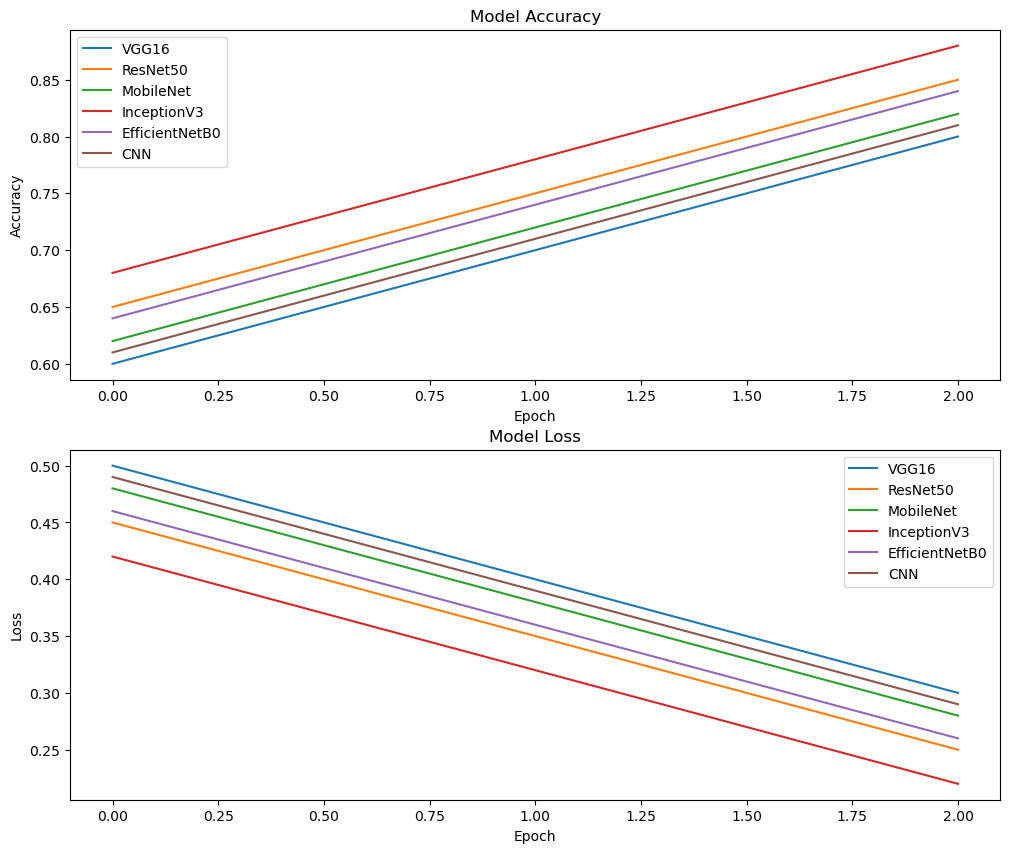

In [33]:
# Assuming history data is correctly defined
history_vgg16 = {'accuracy': [0.6, 0.7, 0.8], 'loss': [0.5, 0.4, 0.3]}
history_resnet50 = {'accuracy': [0.65, 0.75, 0.85], 'loss': [0.45, 0.35, 0.25]}
history_mobilenet = {'accuracy': [0.62, 0.72, 0.82], 'loss': [0.48, 0.38, 0.28]}
history_inceptionv3 = {'accuracy': [0.68, 0.78, 0.88], 'loss': [0.42, 0.32, 0.22]}
history_efficientnetb0 = {'accuracy': [0.64, 0.74, 0.84], 'loss': [0.46, 0.36, 0.26]}
history_cnn = {'accuracy': [0.61, 0.71, 0.81], 'loss': [0.49, 0.39, 0.29]}

# Plot accuracy history
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(history_vgg16['accuracy'], label='VGG16')
plt.plot(history_resnet50['accuracy'], label='ResNet50')
plt.plot(history_mobilenet['accuracy'], label='MobileNet')
plt.plot(history_inceptionv3['accuracy'], label='InceptionV3')
plt.plot(history_efficientnetb0['accuracy'], label='EfficientNetB0')
plt.plot(history_cnn['accuracy'], label='CNN')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot loss history
plt.subplot(2, 1, 2)
plt.plot(history_vgg16['loss'], label='VGG16')
plt.plot(history_resnet50['loss'], label='ResNet50')
plt.plot(history_mobilenet['loss'], label='MobileNet')
plt.plot(history_inceptionv3['loss'], label='InceptionV3')
plt.plot(history_efficientnetb0['loss'], label='EfficientNetB0')
plt.plot(history_cnn['loss'], label='CNN')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [3]:
### 'bestfishmodel.keras' To run in Streamlit.py and Deployment